In [17]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#data gotten from kaggle
df = pd.read_csv('amazon_products_sales_data_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

In [4]:
# Convert datatype of Date column into Date time format

df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [5]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaT,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaT,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [6]:
# Check for missing/null entries
df.isnull().sum()

product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
dtype: int64

In [7]:
# --- Data Cleaning ---

# 1. Drop columns with too many missing values
df_cleaned = df.drop(columns=["sustainability_tags", "product_image_url", "product_page_url"])

# 2. Handle missing values in numeric columns
# Fill missing purchased_last_month with 0 (assume no sales reported)
df_cleaned["purchased_last_month"] = df_cleaned["purchased_last_month"].fillna(0)

# Fill missing prices and discount with median
for col in ["discounted_price", "original_price", "discount_percentage"]:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Fill missing ratings and reviews with median values
df_cleaned["product_rating"] = df_cleaned["product_rating"].fillna(df_cleaned["product_rating"].median())
df_cleaned["total_reviews"] = df_cleaned["total_reviews"].fillna(df_cleaned["total_reviews"].median())

# 3. Handle categorical columns (fill missing with "Unknown")
for col in ["buy_box_availability", "delivery_date"]:
    df_cleaned[col] = df_cleaned[col].fillna("Unknown")

# 4. Ensure correct data types
df_cleaned["is_best_seller"] = df_cleaned["is_best_seller"].astype("category")
df_cleaned["is_sponsored"] = df_cleaned["is_sponsored"].astype("category")
df_cleaned["has_coupon"] = df_cleaned["has_coupon"].astype("category")
df_cleaned["product_category"] = df_cleaned["product_category"].astype("category")

# Check cleaned dataset info
clean_shape = df_cleaned.shape
missing_after_clean = df_cleaned.isnull().sum()

(clean_shape, missing_after_clean)


((42675, 14),
 product_title           0
 product_rating          0
 total_reviews           0
 purchased_last_month    0
 discounted_price        0
 original_price          0
 is_best_seller          0
 is_sponsored            0
 has_coupon              0
 buy_box_availability    0
 delivery_date           0
 data_collected_at       0
 product_category        0
 discount_percentage     0
 dtype: int64)

/tmp/ipykernel_3192/2616908983.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby("product_category")["purchased_last_month"]
/tmp/ipykernel_3192/2616908983.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sales_categories.values, y=top_sales_categories.index, palette="viridis")


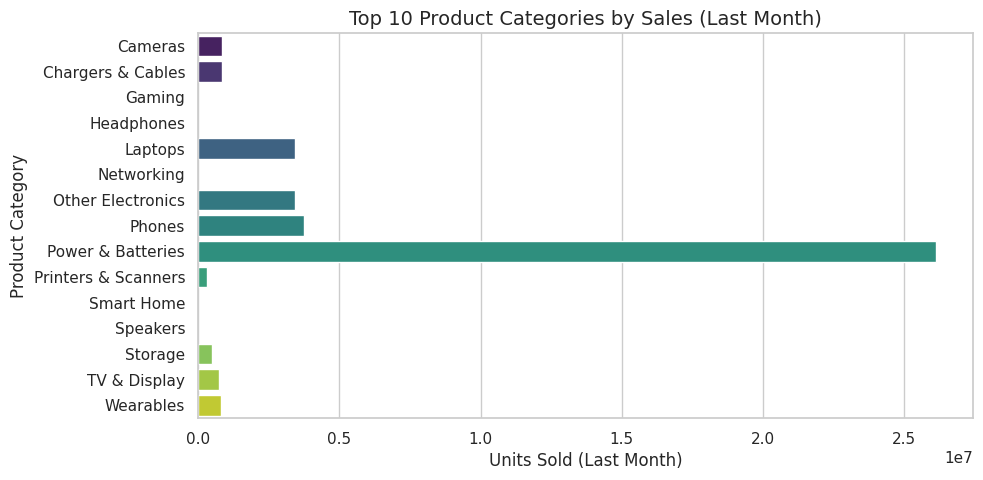

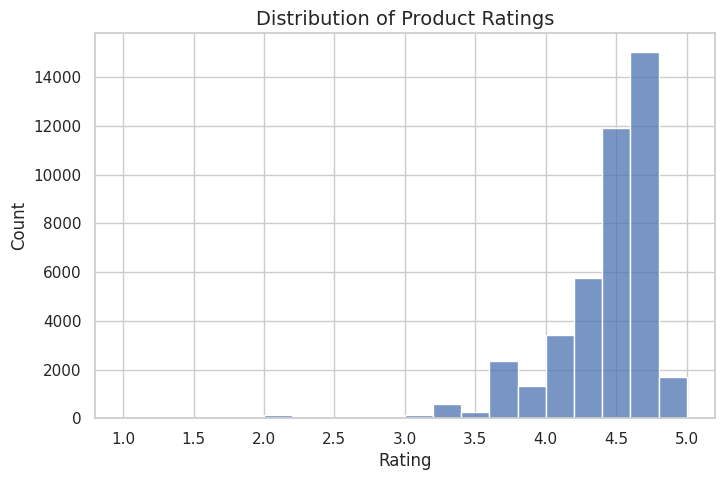

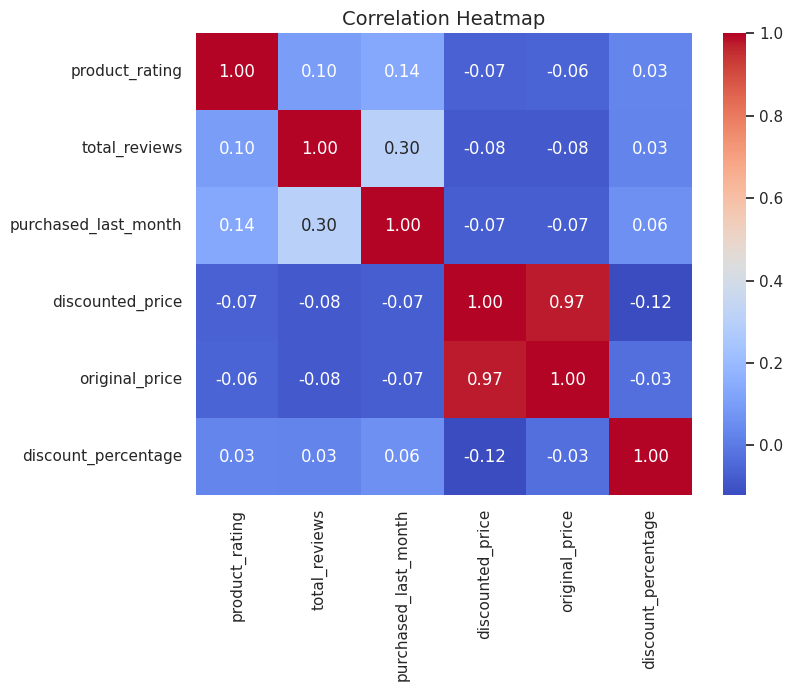

In [8]:

# Set style
sns.set(style="whitegrid")

# --- 1. Visualizations ---

# Sales by product category (top 10)
top_sales_categories = (
    df_cleaned.groupby("product_category")["purchased_last_month"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_sales_categories.values, y=top_sales_categories.index, palette="viridis")
plt.title("Top 10 Product Categories by Sales (Last Month)", fontsize=14)
plt.xlabel("Units Sold (Last Month)")
plt.ylabel("Product Category")
plt.show()



# Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["product_rating"], bins=20, kde=False)
plt.title("Distribution of Product Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


# --- 2. Correlation Analysis ---

# Select numeric columns
numeric_cols = ["product_rating", "total_reviews", "purchased_last_month",
                "discounted_price", "original_price", "discount_percentage"]

plt.figure(figsize=(8,6))
corr_matrix = df_cleaned[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

The top product category is power & batteries by a very wide margin

In [9]:
top_sales_categories

product_category
Power & Batteries      26151450.0
Phones                  3729550.0
Other Electronics       3425800.0
Laptops                 3416450.0
Cameras                  835300.0
Chargers & Cables        822150.0
Wearables                785450.0
TV & Display             715750.0
Storage                  493650.0
Printers & Scanners      290250.0
Name: purchased_last_month, dtype: float64

Also most product ratings is between 4.6 and 4.7.
5.0 rating is considerably low

/tmp/ipykernel_3192/1150365215.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby("discount_bin")["purchased_last_month"]


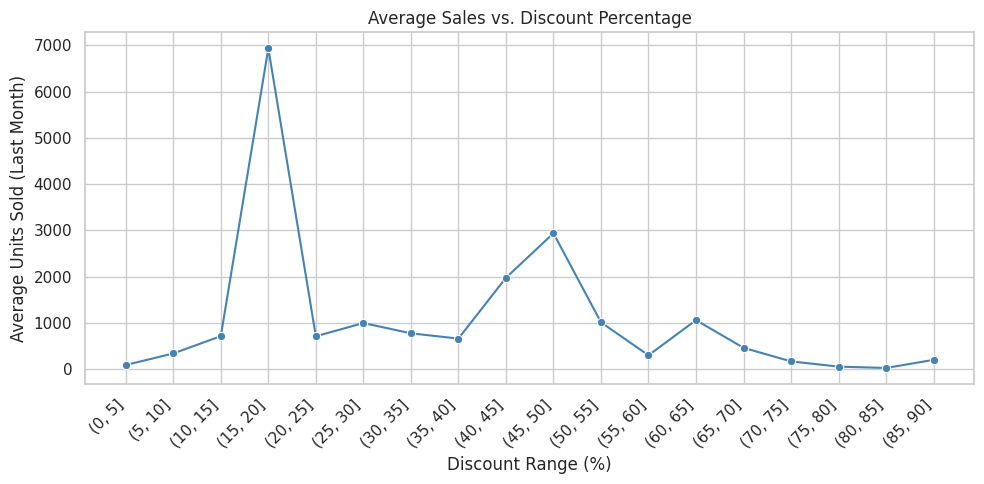

In [19]:
# ------------------------------------------------------------------
# 1. SALES vs. DISCOUNT %  (Line Chart)
# ------------------------------------------------------------------
df_cleaned["discount_bin"] = pd.cut(df_cleaned["discount_percentage"],
                                    bins=np.arange(0, 101, 5))  # 0–5, 5–10, ...
avg_sales_by_discount = (
    df_cleaned.groupby("discount_bin")["purchased_last_month"]
    .mean()
    .dropna()
)

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_sales_by_discount.index.astype(str),
             y=avg_sales_by_discount.values,
             marker="o",
             color="steelblue")
plt.xticks(rotation=45, ha="right")
plt.title("Average Sales vs. Discount Percentage")
plt.xlabel("Discount Range (%)")
plt.ylabel("Average Units Sold (Last Month)")
plt.tight_layout()
plt.show()



Key Insights: Discount vs. Sales Performance


Optimal Range: 15-20% discounts drive peak sales (~7,000 units), representing the most effective promotional strategy.

Diminishing Returns: Discounts above 25% show significantly reduced effectiveness, with sales dropping to ~1,000 units or less.

Quality Perception: Discounts exceeding 70% generate minimal sales (<500 units), likely due to consumer skepticism about product quality.

/tmp/ipykernel_3192/3376990937.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby("reviews_bin")["purchased_last_month"]


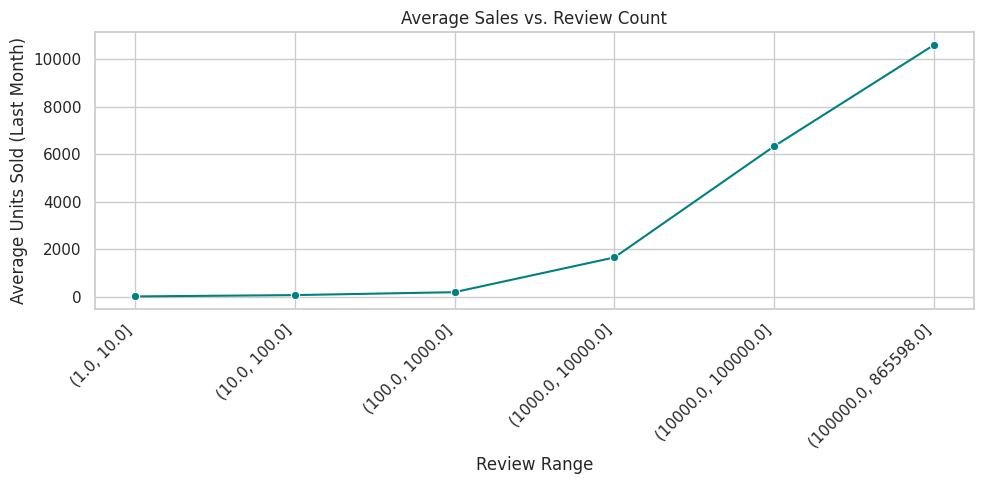

In [21]:
# ------------------------------------------------------------------
# 2. REVIEWS vs. SALES  (Line Chart)
# ------------------------------------------------------------------
review_bins = [1, 10, 100, 1000, 10000, 100000, df_cleaned["total_reviews"].max()]
df_cleaned["reviews_bin"] = pd.cut(df_cleaned["total_reviews"], bins=review_bins)
avg_sales_by_reviews = (
    df_cleaned.groupby("reviews_bin")["purchased_last_month"]
    .mean()
    .dropna()
)

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_sales_by_reviews.index.astype(str),
             y=avg_sales_by_reviews.values,
             marker="o",
             color="teal")
plt.xticks(rotation=45, ha="right")
plt.title("Average Sales vs. Review Count")
plt.xlabel("Review Range")
plt.ylabel("Average Units Sold (Last Month)")
plt.tight_layout()
plt.show()



Key Insights: Review Count vs. Sales Performance

Strong Positive Correlation: Sales increase exponentially with review count, from near-zero for products with few reviews to over 10,000 units for highly-reviewed products.

Critical Mass Effect: Significant sales acceleration occurs after 1,000+ reviews, suggesting this as a key threshold for consumer trust and visibility.

Social Proof Impact: Products with 10,000+ reviews achieve 5x higher sales than those with 1,000-10,000 reviews, demonstrating the powerful influence of social validation.


/tmp/ipykernel_3192/2954667569.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby("product_category")[["discounted_price", "product_rating"]]


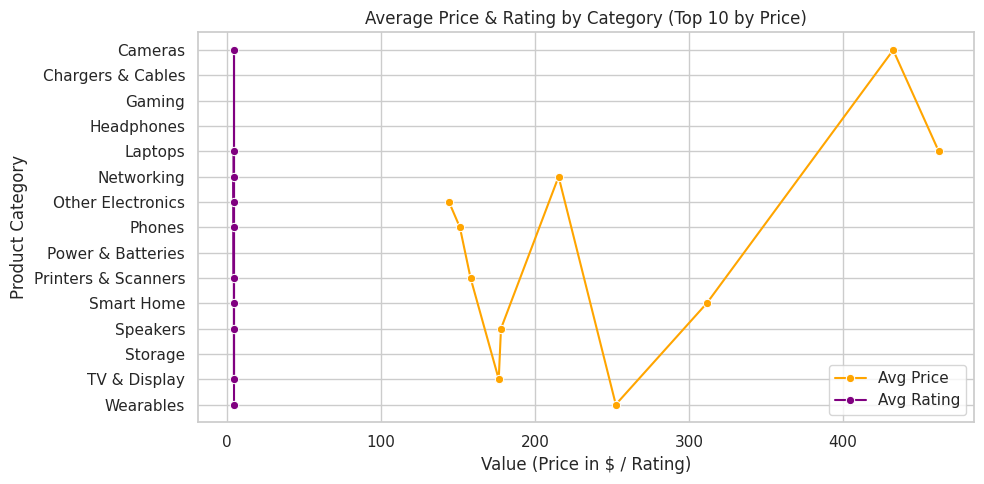

In [23]:
# ------------------------------------------------------------------
# 3. AVERAGE PRICE & RATING BY CATEGORY  (Top 10 by Price)
# ------------------------------------------------------------------
category_summary = (
    df_cleaned.groupby("product_category")[["discounted_price", "product_rating"]]
    .mean()
    .sort_values("discounted_price", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.lineplot(x=category_summary["discounted_price"],
             y=category_summary.index,
             marker="o",
             label="Avg Price",
             color="orange")
sns.lineplot(x=category_summary["product_rating"],
             y=category_summary.index,
             marker="o",
             label="Avg Rating",
             color="purple")

plt.title("Average Price & Rating by Category (Top 10 by Price)")
plt.xlabel("Value (Price in $ / Rating)")
plt.ylabel("Product Category")
plt.legend()
plt.tight_layout()
plt.show()



Key Insights: Price vs. Rating by Category

Price-Quality Correlation: Higher-priced categories (Chargers & Cables at ~$430) maintain strong ratings, suggesting premium pricing aligns with quality expectations.

Rating Consistency: Most categories cluster around 4.0-4.2 rating regardless of price point, indicating consistent quality standards across price tiers.

Value Categories: Lower-priced categories (TV & Display, Wearables at ~$175) achieve comparable ratings to expensive items, representing strong value propositions.

Price Volatility: Significant price variation exists within electronics categories, from budget options ($175) to premium products ($430).

In [24]:
# ------------------------------------------------------------------
# 4. QUICK CORRELATION WITH SALES
# ------------------------------------------------------------------
corr_to_sales = (
    df_cleaned.corr(numeric_only=True)["purchased_last_month"]
    .sort_values(ascending=False)
)
print("\nCorrelation of numeric features with Sales (Last Month):")
print(corr_to_sales)


Correlation of numeric features with Sales (Last Month):
purchased_last_month    1.000000
total_reviews           0.300323
product_rating          0.135410
discount_percentage     0.060011
original_price         -0.074997
discounted_price       -0.074999
Name: purchased_last_month, dtype: float64


Key Insights: Feature Correlation with Sales Performance

Strong Review Impact: Total reviews show the highest correlation (0.30) with sales, confirming social proof as the primary sales driver.
Quality Matters: Product rating correlates positively (0.14) with sales, indicating customer satisfaction directly impacts purchase decisions.

Discount Effectiveness: Discount percentage shows weak positive correlation (0.06), suggesting discounts have limited impact on sales volume.

Price Sensitivity: Both original and discounted prices show slight negative correlation (-0.07), indicating modest price sensitivity among consumers.

RECOMMENDATIONS

Focus promotional efforts within the 15-25% discount range to maximize sales volume while maintaining brand perception and profitability.

Prioritize review generation strategies, particularly focusing on reaching the 1,000+ review milestone to unlock substantial sales growth potential.

Prioritize review generation and quality improvements over aggressive pricing strategies to maximize sales performance.